In [1]:
#import library
import pandas as pd
import numpy as np
import math
import utils

In [ ]:
#turn data into useful data
df_raw_data = utils.getdata("Data/shcmp 5m.csv")
df_raw_data.head(5)
dct_data_set = dict()
dct_data_set['Realized Volatility'] = utils.get_realized_volatility(df_raw_data)
dct_data_set['Date'] = utils.get_date(df_raw_data)

In [2]:
#get data and turn into dataframe
df_data_set = pd.read_csv("Data/Realized Vol.csv")
df_data_set['Date'] = pd.to_datetime(df_data_set['Date'])
df_data_set.set_index('Date',inplace=True)
df_data_set.head(5)

,Realized Volatility
Date,
2005-01-04,0.645193
2005-01-05,1.293114
2005-01-06,0.497776
2005-01-07,1.139912
2005-01-10,0.541123


In [3]:
df_raw_data = pd.read_csv("Data/shcomp technical.csv")
df_raw_data['Date'] = pd.to_datetime(df_raw_data['Date'])
df_raw_data.set_index('Date',inplace=True)
df_raw_data.head(5)

,open,high,low,close,volume,pct_chg,swing,turn,BIAS,RSI,DMA
Date,,,,,,,,,,,
2000-01-04,1368.693,1407.518,1361.214,1406.371,903402300,2.9117,3.3883,0.9906,2.2708,65.0531,-10.3336
2000-01-05,1407.829,1433.780,1398.323,1409.682,1057998400,0.2354,2.5212,1.5534,2.5852,66.4627,3.5193
2000-01-06,1406.036,1463.955,1400.253,1463.942,1348051500,3.8491,4.5189,1.8425,6.0058,81.2972,19.6990
2000-01-07,1477.154,1522.825,1477.154,1516.604,3451569900,3.5973,3.1197,3.6095,8.8021,87.6562,38.7252
2000-01-10,1531.712,1546.723,1506.404,1545.112,3125353900,1.8797,2.6585,3.4032,9.4678,89.8894,56.8665


In [4]:
#create abs pch_chg
df_raw_data['squared_pct_chg'] = abs(df_raw_data['pct_chg'])

#create LnClose and LnOpen
df_raw_data['LnClose'] = np.log(df_raw_data['close'])
df_raw_data['LnOpen'] = np.log(df_raw_data['open'])

#create LnClose Moving average, period=5
df_raw_data['5MA_LnClose'] = df_raw_data['LnClose'].rolling(5).mean()

#create absolute bias, bias means the difference between closing price and moving average
df_raw_data['Abs_Bias'] = abs(df_raw_data['LnClose'] - df_raw_data['5MA_LnClose'])

#Create Overnight spread
#OI = Open - Close_(t-1)
Overnight_Information = [np.nan]*len(df_raw_data)
for i in range(1,len(df_raw_data)):
    Overnight_Information[i] = df_raw_data.iloc[i]['LnOpen'] - df_raw_data.iloc[i-1]['LnClose']
df_raw_data['Overnight_Information'] = Overnight_Information
df_raw_data['abs_overnight_info'] = abs(df_raw_data['Overnight_Information'])
df_raw_data['abs_overnight_info'] = df_raw_data['abs_overnight_info'].shift(-1)

df_raw_data.head(5)


,open,high,low,close,volume,pct_chg,swing,turn,BIAS,RSI,DMA,squared_pct_chg,LnClose,LnOpen,5MA_LnClose,Abs_Bias,Overnight_Information,abs_overnight_info
Date,,,,,,,,,,,,,,,,,,
2000-01-04,1368.693,1407.518,1361.214,1406.371,903402300,2.9117,3.3883,0.9906,2.2708,65.0531,-10.3336,2.9117,7.248768,7.221612,NaN,NaN,NaN,0.001036
2000-01-05,1407.829,1433.780,1398.323,1409.682,1057998400,0.2354,2.5212,1.5534,2.5852,66.4627,3.5193,0.2354,7.251119,7.249804,NaN,NaN,0.001036,0.002590
2000-01-06,1406.036,1463.955,1400.253,1463.942,1348051500,3.8491,4.5189,1.8425,6.0058,81.2972,19.6990,3.8491,7.288888,7.248530,NaN,NaN,-0.002590,0.008984
2000-01-07,1477.154,1522.825,1477.154,1516.604,3451569900,3.5973,3.1197,3.6095,8.8021,87.6562,38.7252,3.5973,7.324229,7.297873,NaN,NaN,0.008984,0.009912
2000-01-10,1531.712,1546.723,1506.404,1545.112,3125353900,1.8797,2.6585,3.4032,9.4678,89.8894,56.8665,1.8797,7.342852,7.334141,7.291171,0.05168,0.009912,0.001659


In [18]:
df_raw_data['adj_volume'] = df_raw_data['volume']/df_raw_data['close']

In [5]:
#set the df to contain only useful variable
Variables = []
Variables.append('Abs_Bias')
Variables.append('squared_pct_chg')
Variables.append('abs_overnight_info')
#Variables.append('BIAS')
#Variables.append('pct_chg')
#Variables.append('Overnight_Information')
#Variables.append('adj_volume')

#Set the len of data set as same as df_data_set 
#so the data len could match with previous
for variable in Variables:
    new = []
    for date in df_data_set.index:
        new.append(df_raw_data.loc[date][variable])
    df_data_set[variable] = new
df_data_set

,Realized Volatility,Abs_Bias,squared_pct_chg,abs_overnight_info
Date,,,,
2005-01-04,0.645193,0.019449,1.8730,0.000879
2005-01-05,1.293114,0.007835,0.7373,0.000444
2005-01-06,0.497776,0.012324,0.9990,0.000086
2005-01-07,1.139912,0.003444,0.4289,0.000940
2005-01-10,0.541123,0.004926,0.6150,0.000247
...,...,...,...,...
2023-02-22,0.223816,0.005814,0.4650,0.000721
2023-02-23,0.343995,0.002345,0.1115,0.000067
2023-02-24,0.294861,0.006512,0.6180,0.003115


In [10]:
df_date = pd.read_csv("Data/Realized Vol.csv")
df_date = df_date[-439:]
df_date.set_index('Date',inplace=True)
df_date.to_csv("Data/date.csv")
df_date


,Realized Volatility
Date,
2021-05-11,0.794308
2021-05-12,0.480160
2021-05-13,0.647137
2021-05-14,0.489060
2021-05-17,0.423597
...,...
2023-02-22,0.223816
2023-02-23,0.343995
2023-02-24,0.294861


c:\Users\waibo\Desktop\LSTM - SHCOMP - year05-23 - 5m\utils.py:38: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


KeyError: 'adj_volume'

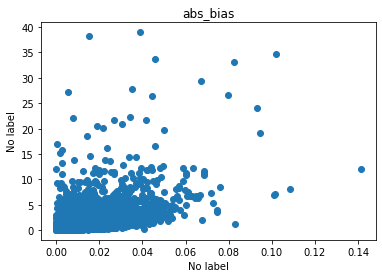

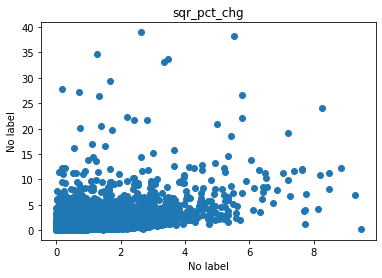

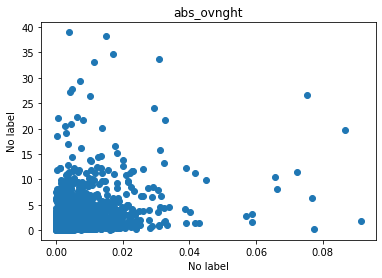

In [6]:
utils.plot_scatter_xy(df_data_set['Abs_Bias'],df_data_set['Realized Volatility'],title='abs_bias')
#utils.plot_scatter_xy(df_data_set['BIAS'],df_data_set['Realized Volatility'],title='BIAS')
#utils.plot_scatter_xy(df_data_set['Abs_Bias'],abs(df_data_set['BIAS']),title='bias&bias')
utils.plot_scatter_xy(df_data_set['squared_pct_chg'],df_data_set['Realized Volatility'],title='sqr_pct_chg')
#utils.plot_scatter_xy(df_data_set['pct_chg'],df_data_set['Realized Volatility'],title='pct_chg')
utils.plot_scatter_xy(df_data_set['abs_overnight_info'],df_data_set['Realized Volatility'],title='abs_ovnght')
utils.plot_scatter_xy(df_data_set['adj_volume'],df_data_set['Realized Volatility'],title='volume')


In [31]:
df_data_set.to_csv("Data/shcmp multi variable.csv")

In [9]:
##prepare data for HAR-RV
#Lag1
#Lag5.mean
#Lag22.mean
df_HAR = pd.DataFrame()
df_HAR['Realized Volatility'] = df_data_set['Realized Volatility']
df_HAR['Constant'] = np.array([1]*len(df_data_set))
df_HAR['RV_lag1'] = df_data_set['Realized Volatility'].shift(1)
df_HAR['5MA_RV'] = df_data_set['Realized Volatility'].rolling(5).mean().shift(1)
df_HAR['22MA_RV'] = df_data_set['Realized Volatility'].rolling(22).mean().shift(1)
df_HAR['Abs_Bias_lag1'] = df_data_set['Abs_Bias'].shift(1)
df_HAR['Abs_pct_chg_lag1'] = df_data_set['squared_pct_chg'].shift(1)
df_HAR['abs_overnight_info_lag1'] = df_data_set['abs_overnight_info'].shift(1)
df_HAR['Abs_Bias_lag2'] = df_data_set['Abs_Bias'].shift(2)
df_HAR['Abs_pct_chg_lag2'] = df_data_set['squared_pct_chg'].shift(2)
df_HAR['abs_overnight_info_lag2'] = df_data_set['abs_overnight_info'].shift(2)
df_HAR['Abs_Bias_lag3'] = df_data_set['Abs_Bias'].shift(3)
df_HAR['squared_pct_chg_lag3'] = df_data_set['squared_pct_chg'].shift(3)
df_HAR['abs_overnight_info_lag3'] = df_data_set['abs_overnight_info'].shift(3)
df_HAR = df_HAR[22:]


In [10]:
df_HAR

,Realized Volatility,Constant,RV_lag1,5MA_RV,22MA_RV,Abs_Bias_lag1,Abs_pct_chg_lag1,abs_overnight_info_lag1,Abs_Bias_lag2,Abs_pct_chg_lag2,abs_overnight_info_lag2,Abs_Bias_lag3,squared_pct_chg_lag3,abs_overnight_info_lag3
Date,,,,,,,,,,,,,,
2005-02-03,3.711811,1,3.041918,1.114210,0.943433,0.030942,5.3467,0.001048,0.019455,0.2427,0.000480,0.027719,1.8003,0.001950
2005-02-04,1.455927,1,3.711811,1.766252,1.082825,0.020110,0.8138,0.002981,0.030942,5.3467,0.001048,0.019455,0.2427,0.000480
2005-02-16,1.203328,1,1.455927,1.968796,1.090226,0.032456,2.1490,0.005510,0.020110,0.8138,0.002981,0.030942,5.3467,0.001048
2005-02-17,0.737522,1,1.203328,2.064023,1.122296,0.026108,0.7782,0.000897,0.032456,2.1490,0.005510,0.020110,0.8138,0.002981
2005-02-18,0.478975,1,0.737522,2.030101,1.104006,0.009802,0.2147,0.000368,0.026108,0.7782,0.000897,0.032456,2.1490,0.005510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-22,0.223816,1,0.552709,0.612850,0.325947,0.011124,0.4919,0.004387,0.007019,2.0569,0.000393,0.012965,0.7696,0.001998
2023-02-23,0.343995,1,0.223816,0.630465,0.316384,0.005814,0.4650,0.000721,0.011124,0.4919,0.004387,0.007019,2.0569,0.000393
2023-02-24,0.294861,1,0.343995,0.456112,0.324377,0.002345,0.1115,0.000067,0.005814,0.4650,0.000721,0.011124,0.4919,0.004387


In [18]:
df_HAR.to_csv('Data/shcmp multi variable for HAR.csv')